### Geopandas
[공식 document](https://geopandas.org/en/stable/)
1. within : 포함되는지 여부
2. contains : 포함하고 있는지 여부
3. intersects : 교차 여부 (경계에 닿아 있기만 해도 좋다)
4. crosses : 교차 여부 (내부를 지나가는)
5. distance : 두 공간 객체 사이의 직선(최단)거리 계산

In [224]:
from shapely.geometry import Point, Polygon, LineString
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

In [225]:
path = './데이터'
all_files = os.listdir(path)
csv_files = [f for f in all_files if f.endswith('.csv')]

dataframes = [pd.read_csv(os.path.join(path, f)) for f in csv_files]

df = pd.concat(dataframes, ignore_index=True)
print(df.shape)
df.head()

(380998, 6)


,oid,collection_dt,longitude,latitude,time,Diff
0,46100025,20210501112730,126.529756,33.511141,2021-05-01 11:27:30,2279.0
1,46100025,20210501131830,126.508146,33.516195,2021-05-01 13:18:30,1895.0
2,46100025,20210501142030,126.492275,33.495973,2021-05-01 14:20:30,593402.0
3,46100025,20210508113430,126.915050,33.450817,2021-05-08 11:34:30,2159.0
4,46100025,20210508123030,126.778668,33.443488,2021-05-08 12:30:30,5398.0


In [226]:
lon = 'longitude'
lat = 'latitude'

In [244]:
cond1 = (df[lon] < 128.60) & (df[lon]>123.05)
cond2 = (df[lat] < 33.56) & (df[lat] >33)

df_2 = df[cond1 & cond2]
df_2.reset_index(drop=True, inplace=True)

In [245]:
def get_transform(df: pd.DataFrame, lat='latitude', lon='longitude'):
    # csv to geopandas
    # lon, lat, data geometry로 변경한다
    df[lat] = df[lat].astype(float)
    df[lon] = df[lon].astype(float)
    df['geometry'] = df.apply(lambda row: Point([row[lon], row[lat]]), axis=1)
    DataFrame = gpd.GeoDataFrame(df, geometry='geometry')
    DataFrame.crs = {'init': 'epsg:4326'}
    DataFrame = DataFrame.to_crs({'init':'epsg:4326'}) # 좌표계 epsg: 4326
    return DataFrame

In [246]:
geo = get_transform(df_2, lat='latitude', lon='longitude')
geo

/home/dabs/.conda/envs/InHeon/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/dabs/.conda/envs/InHeon/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/dabs/.conda/envs/InHeon/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,oid,collection_dt,longitude,latitude,time,Diff,geometry
0,46100025,20210501112730,126.529756,33.511141,2021-05-01 11:27:30,2279.0,POINT (126.52976 33.51114)
1,46100025,20210501131830,126.508146,33.516195,2021-05-01 13:18:30,1895.0,POINT (126.50815 33.51620)
2,46100025,20210501142030,126.492275,33.495973,2021-05-01 14:20:30,593402.0,POINT (126.49228 33.49597)
3,46100025,20210508113430,126.915050,33.450817,2021-05-08 11:34:30,2159.0,POINT (126.91505 33.45082)
4,46100025,20210508123030,126.778668,33.443488,2021-05-08 12:30:30,5398.0,POINT (126.77867 33.44349)
...,...,...,...,...,...,...,...
380041,46101bc2,20210313174500,126.430855,33.238272,2021-03-13 17:45:00,2250.0,POINT (126.43085 33.23827)
380042,46101bc2,20210313192430,126.833729,33.323197,2021-03-13 19:24:30,1178357.0,POINT (126.83373 33.32320)
380043,46101bc2,20210327115230,126.506827,33.516312,2021-03-27 11:52:30,6467.0,POINT (126.50683 33.51631)
380044,46101bc2,20210327143230,126.498082,33.504243,2021-03-27 14:32:30,4746.0,POINT (126.49808 33.50424)


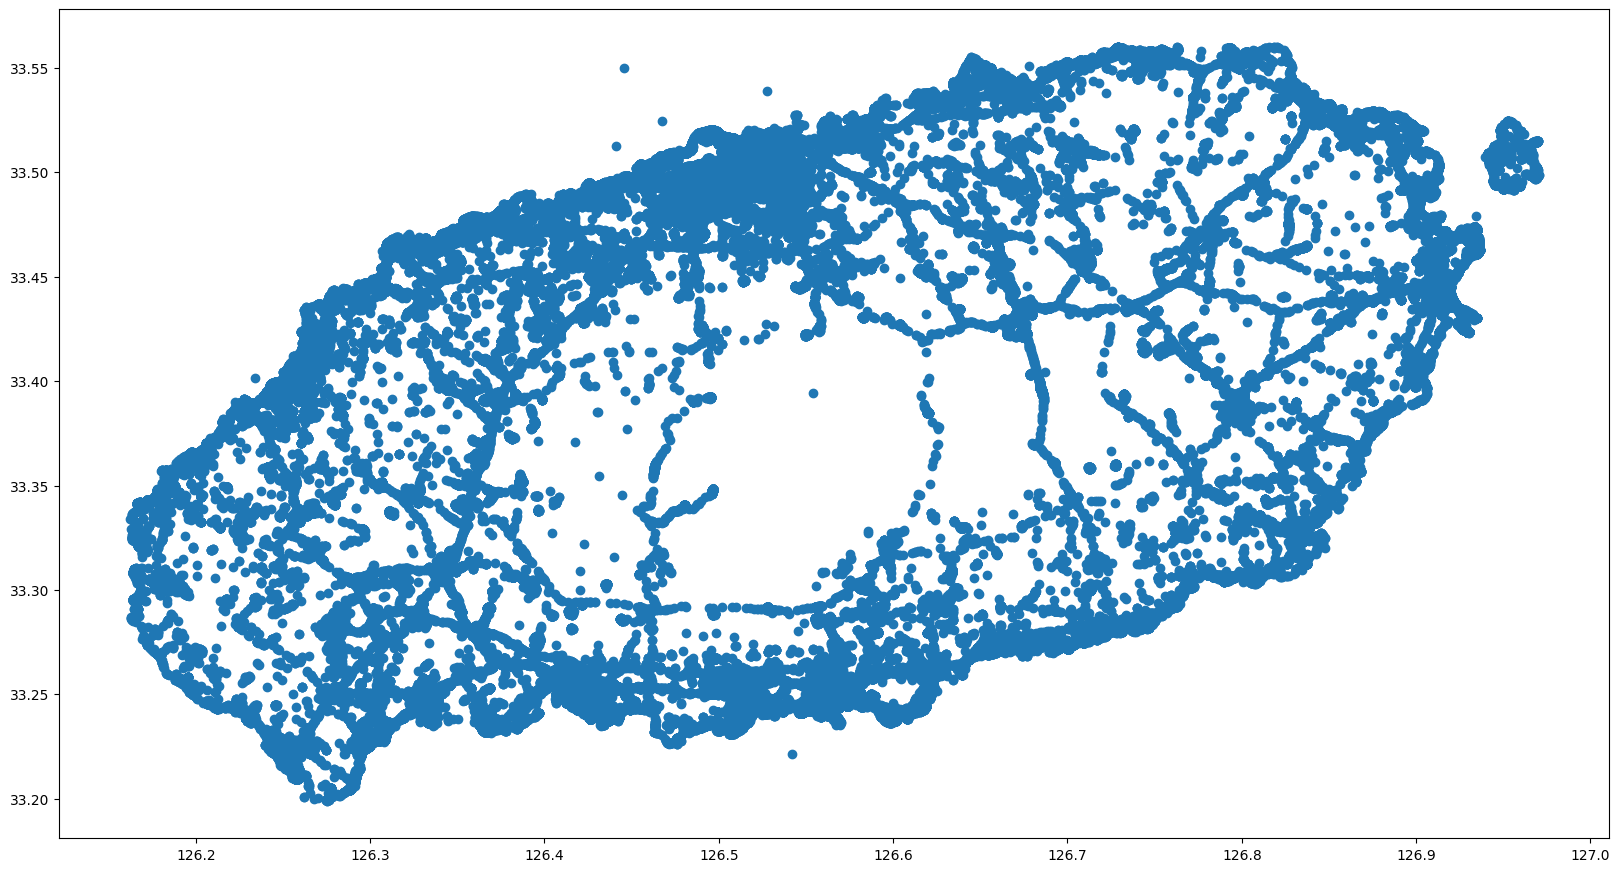

In [247]:
geo.plot(figsize=(20, 20))
plt.show()